In [37]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
get_ipython().run_line_magic('matplotlib', 'inline')

# 1) You arrive at the train station at 10 o’clock, knowing that the train will arrive at some time **uniformly distributed** between 10 and 10:30. What is the probability that you will have to wait longer than 10 minutes?

In [38]:
#Train arriving uniformly distributed in between 10 and 10:30
#Scale being the total length from 10 to 10:30 (30 minutes = 0.5 of an hour)
dist = stats.uniform(loc=10, scale=0.5)

In [39]:
#Appromixating probability of waiting longer than 10 minutes (0.16 of an hour)
1 - dist.cdf(0.16)

1.0

# 2) What is the probability you will have to wait less than 10 minutes?

In [40]:
#Approximating probabilty of waiting less than 10 minutes (0.16 of an hour)
dist.cdf(0.16)

0.0

# 3) What time is in the 60th percentile of this distribution?

In [41]:
#60th percentile
dist.ppf(0.6)

10.3

# 4) What is the probability the train will arrive between 10:10 and 10:20?

In [42]:
#In between 10:20 and 10:10
#20 minues -> 0.33 of an hour 
#10 minutes-> 0.16 of an hour 
#Hence 10.33 - 10.16
dist.cdf(10.33) - dist.cdf(10.16)

0.33999999999999986

# 5) Now say the arrival of trains **follows a Poisson process** where a train arrives once every half-hour. What is the probability that you will have to wait longer than 10 minutes?

In [43]:
#Poisson process of train arriving once every half-hour
dist = stats.poisson(1)

In [44]:
#10 minutes = 0.16 of an hour
#Wating longer than 10 minutes using the inverse
1 - dist.cdf(0.16)

0.6321205588285576

# 6) Knowing that it follows a Poisson process, if at 10:15 the train has not arrived, what is the probability that you will have to wait at least an additional 10 minutes?

In [45]:
#Probability of train arriving in between 10:25 and 10:15
#25 minutes -> 0.41 of an hour
#15 minutes -> 0.25 of an hour
dist.cdf(0.41) - dist.cdf(0.25)

0.0

# 7) At what time does the train have the highest chance of arriving? Create the appropriate graph that corresponds with this belief.

In [46]:
#Exponential distribution of train arriving once every 30 minutes
dist = stats.expon(scale=1)
df = pd.DataFrame()
df['value'] = np.linspace(dist.ppf(0.01), dist.ppf(0.99), 100)
df['PDF'] = dist.pdf(df['value'])
df['CDF'] = dist.cdf(df['value'])

In [47]:
#Highest chance of time at which a train will arrive 
df[df['PDF'] == df['PDF'].max()]

,value,PDF,CDF
0,0.01005,0.99,0.01


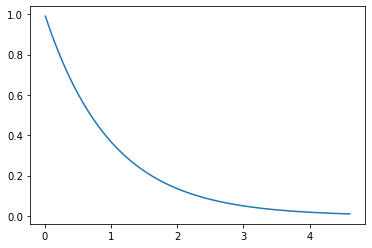

In [48]:
plt.plot(df['value'], df['PDF'])

# 8) Say the results for the midterm for this class have an average of 70 and a standard deviation of 10 (SCARY). What is the probability that a given student has scored over a 90 on the test? How many standard deviations away from the mean is this score?

In [49]:
#Scary midterm
mean=70
std=10
dist = stats.norm(mean,std)

In [50]:
#Chance of student achieving above 90%
1 - dist.cdf(90)

0.02275013194817921

90% is 2 Standard Deviations away from the mean

# 9) What is the probability that a given student has scored below a 65 on the test?

In [51]:
#Probability of scoring below 65%
dist.cdf(65)

0.3085375387259869

# 10) What is the probability that a given student has scored between a 75 and an 85 on the test?

In [52]:
#Probability of scoring in between 75% and 85%
dist.cdf(85) - dist.cdf(75)

0.2417303374571288

# 11) What is the score that is most likely to occur? Create the appropriate graph that corresponds with this belief.

In [53]:
df = pd.DataFrame()
df['value'] = np.linspace(dist.ppf(0.01), dist.ppf(0.99), 100)
df['PDF'] = dist.pdf(df['value'])
df['CDF'] = dist.cdf(df['value'])

In [54]:
#Highest likely score
df[df['PDF'] == df['PDF'].max()]

,value,PDF,CDF
49,69.765015,0.039883,0.490626
50,70.234985,0.039883,0.509374


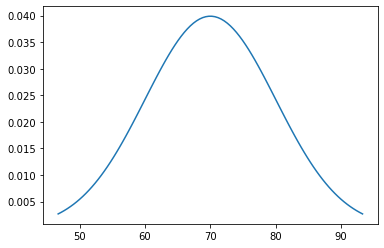

In [55]:
#Graph showcasing 70% highest likely score.
plt.plot(df['value'], df['PDF'])

# 12) What score is in the 72nd percentile?

In [56]:
#72nd percentile
dist.ppf(0.72)

75.82841507271216